# **Tubes Data Mining**

# **1. Preparing Data**

In [42]:
pip install eli5

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [44]:
df = pd.read_csv('/content/data.csv')

In [45]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [46]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
...,...,...,...,...,...
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0
GKReflexes,8.0,11.0,11.0,94.0,13.0


In [47]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


# **2. Data Cleaning**

In [50]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'], axis = 1, inplace = True)

In [52]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [53]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('nilai sama')
else:
    print('nilai berbeda')

nilai sama


In [54]:
df.drop(df.index[missing_height], inplace = True)

In [56]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

In [57]:
df.drop(['Loaned From','Release Clause','Joined'], axis = 1, inplace = True)

# **3. Data Anlysis**

In [58]:
#jumlah negara yang ada dan 5 negara dengan jumlah pemain terbanyak

print('jumlah negara : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nnegara di Eropa dengan jumlah pemain terbanyak")

jumlah negara : 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

negara di Eropa dengan jumlah pemain terbanyak


In [59]:
#jumlah klub dan 5 klub dengan jumlah pemain terbanyak

print('jumlah klub : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

jumlah klub : 651
FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
Name: Club, dtype: int64


In [60]:
#pemain dengan potensi maksimum dan keseluruhan peforma

print('potensi maksimum : '+str(df.loc[df['Potential'].idxmax()][1]))
print('keseluruhan peforma : '+str(df.loc[df['Overall'].idxmax()][1]))

potensi maksimum : K. Mbappé
keseluruhan peforma : L. Messi


In [61]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('pemain dengan akspek terbaik :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

pemain dengan akspek terbaik :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon


In [62]:
#cleaning beberapa nilai sehingga bisa diartikan

def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [63]:
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
...,...,...,...,...,...
GKDiving,6.0,7.0,9.0,90.0,15.0
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0


In [64]:
#pemain dengan nilai tertinggi

print('pemain termahal : '+str(df.loc[df['Value'].idxmax()][1]))
print('pemain dengan gaji tertinggi : '+str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

pemain termahal : Neymar Jr
pemain dengan gaji tertinggi : L. Messi
--------------------------------------------------------------------------------

Top Earners


# **4. Exploratory Data Anlysis**

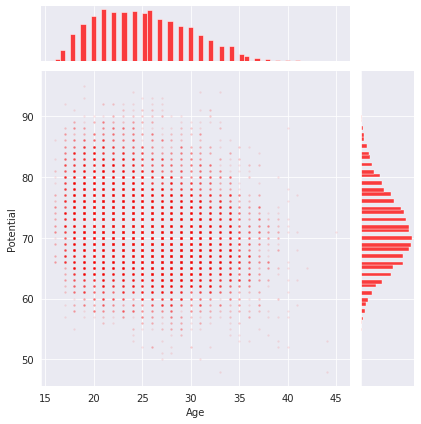

In [65]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

potensi pemain menurun saat bertambah tua

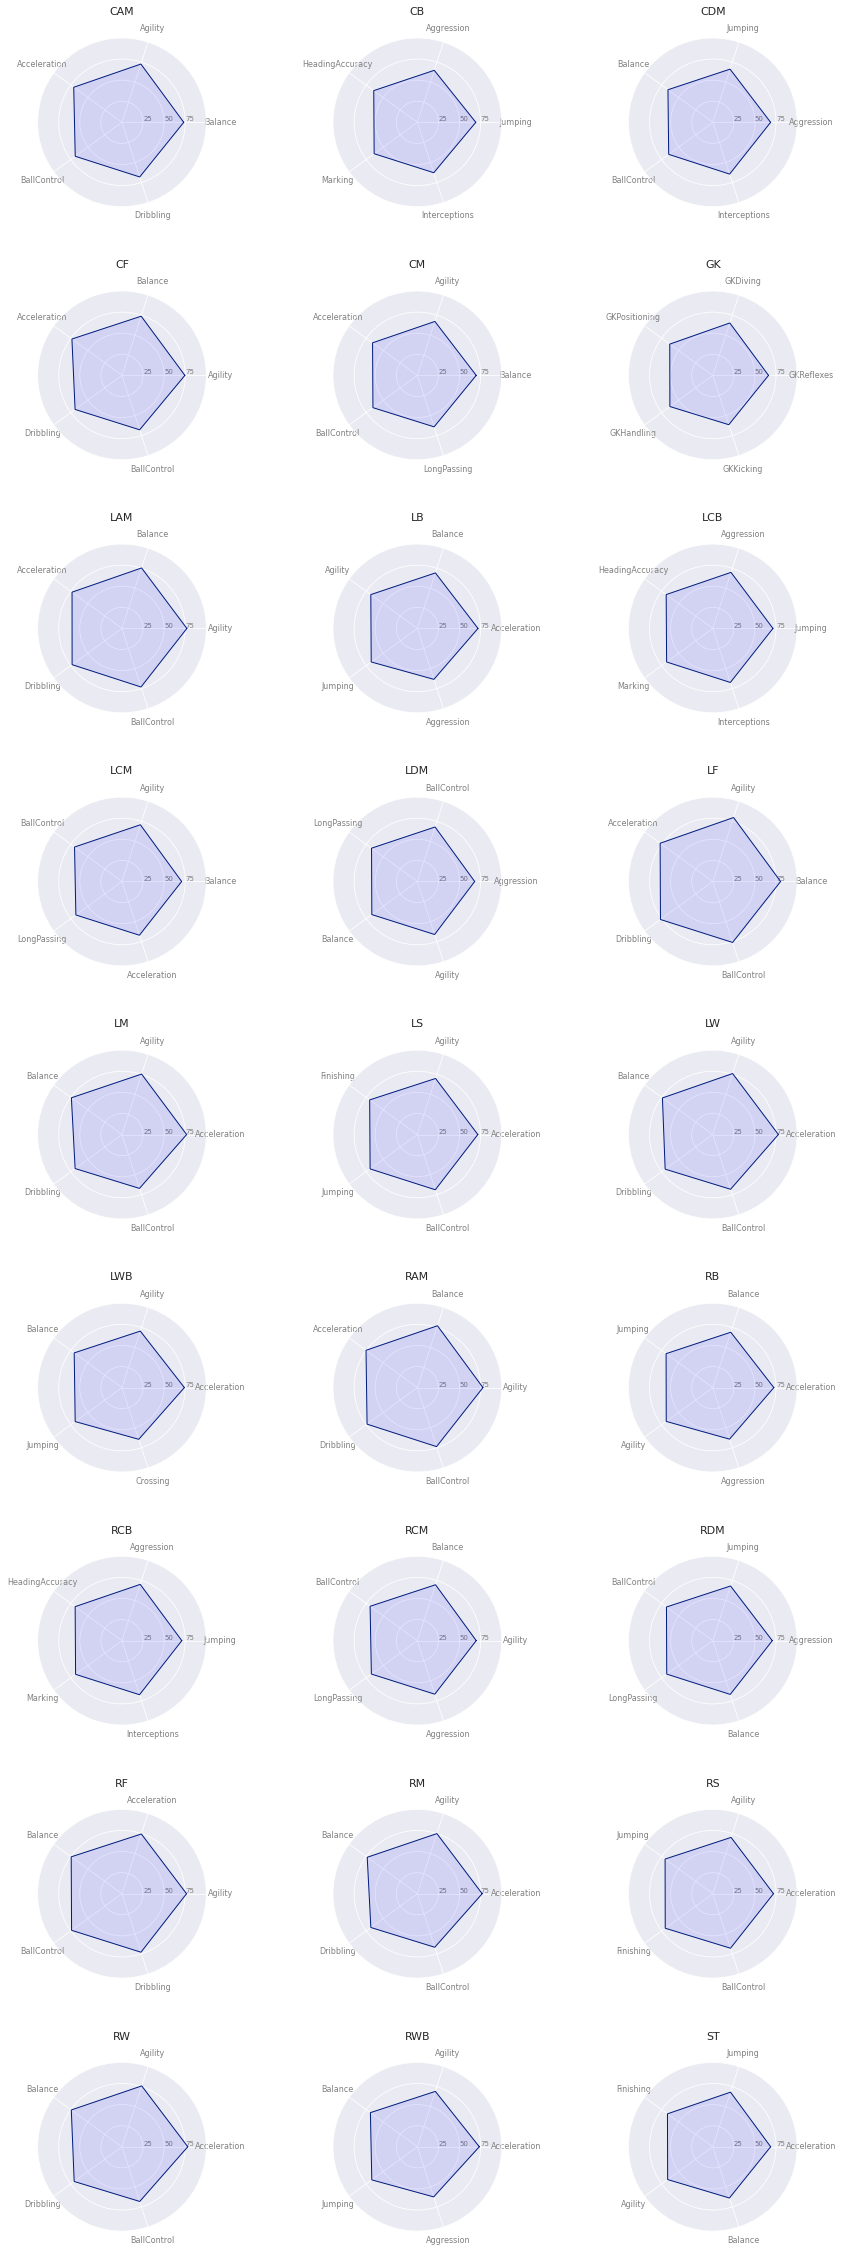

In [66]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # banyak variabel
    categories=top_features.keys()
    N = len(categories)

    # melakukan plotting untuk baris pertama data frame
    # melakukan repitisi untuk nilai pertama untuk graf melingkar
    values = list(top_features.values())
    values += values[:1]

    # berapa besar sudut setiap axis di dalam plot? (kita membagi plot / banyak variabel)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # inisialisasi spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # menggambar satu axis per variabel
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # menggambar ylabel
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # memenuhi area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

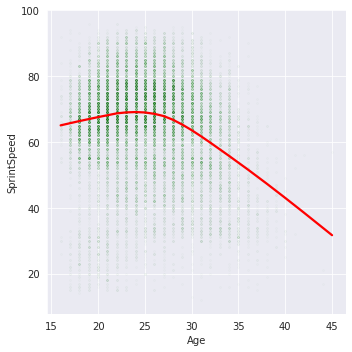

In [67]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

kecepatan pemain menurun saat bertambah tua

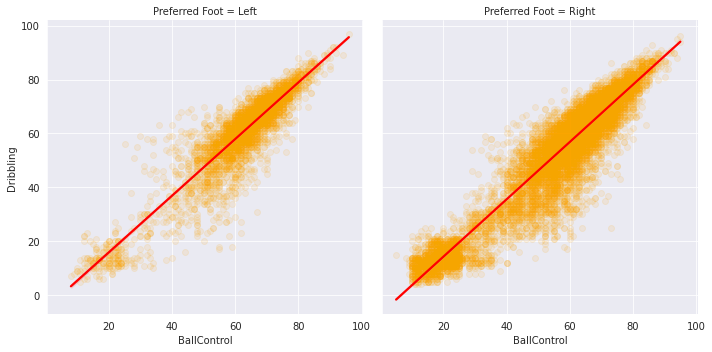

In [68]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

pemain dominan kaki kiri vs pemain dominan kaki kanan

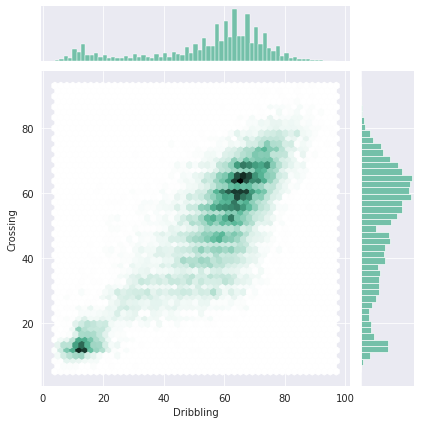

In [69]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

Crossing vs Dribbling

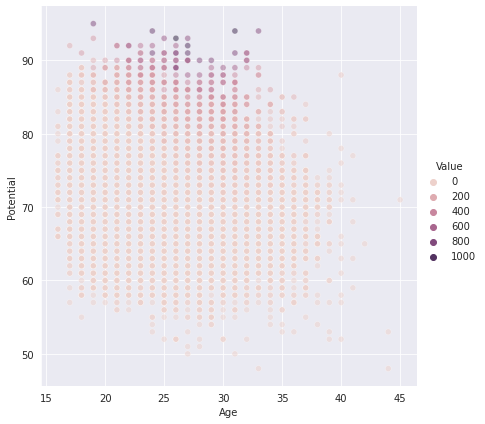

In [70]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

relasi antara potensi dan umur dengan nilai pemain

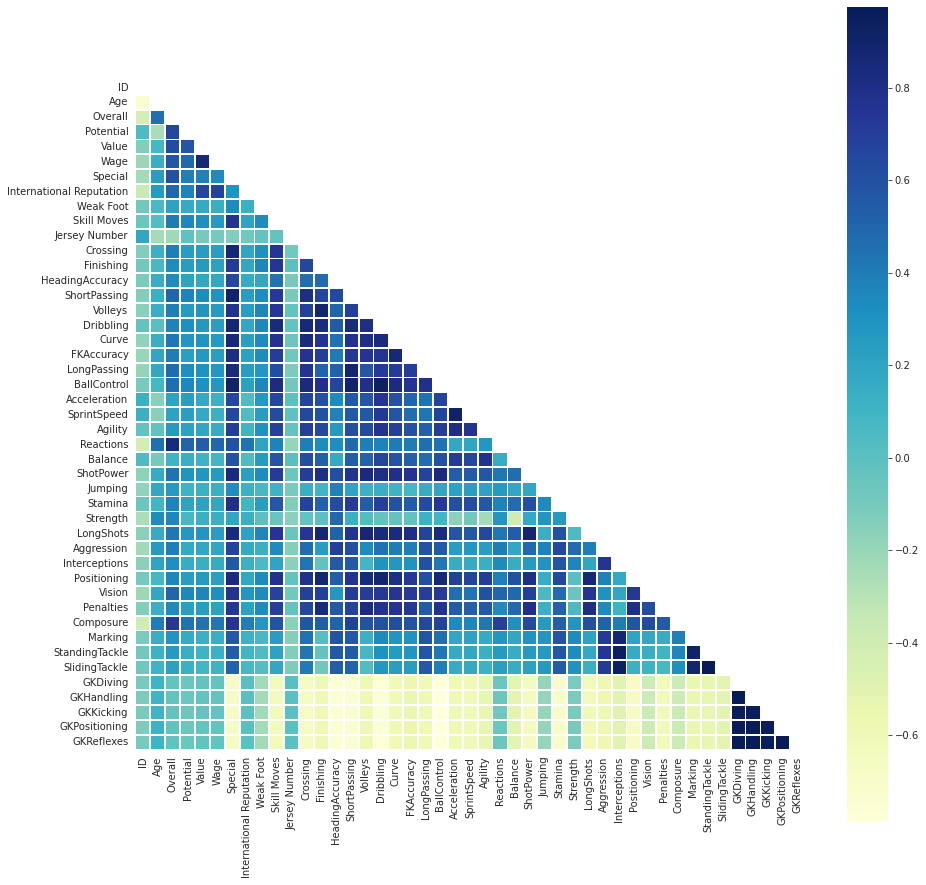

In [71]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

korelasi rendah untuk sisi goalkeeping dengan kolum lain

korelasi tinggi antara Dribbling, Volleys, Passing

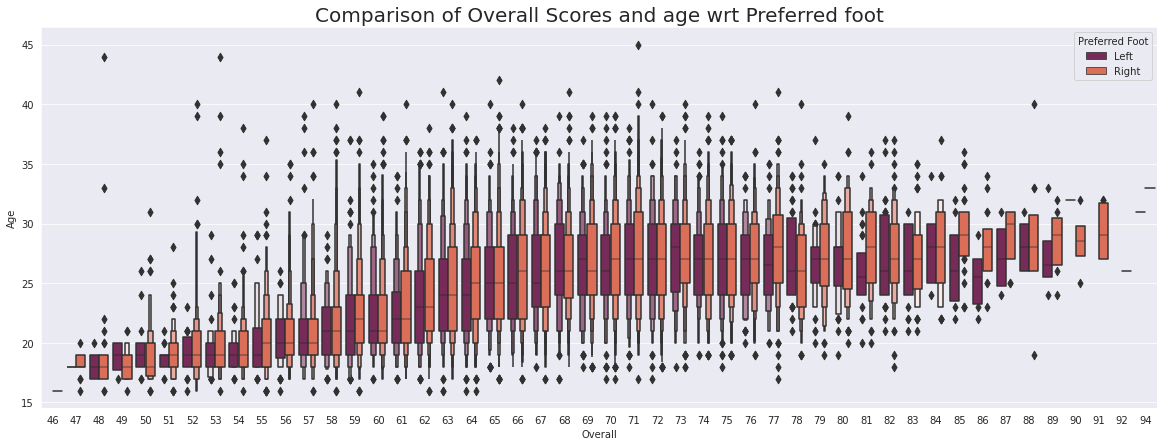

In [29]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

perbandingan antara Age, Overall, Potential, Accelaration, SprintSpeed, Agility , Stamina, Strength

In [30]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

In [31]:
df_small.head()

,Age,Overall,Potential,Acceleration,SprintSpeed,Agility,Stamina,Strength,Preferred Foot
0,31,94,94,91.0,86.0,91.0,72.0,59.0,Left
1,33,94,94,89.0,91.0,87.0,88.0,79.0,Right
2,26,92,93,94.0,90.0,96.0,81.0,49.0,Right
3,27,91,93,57.0,58.0,60.0,43.0,64.0,Right
4,27,91,92,78.0,76.0,79.0,90.0,75.0,Right


In [32]:
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

Output hidden; open in https://colab.research.google.com to view.

dari plot tersebut kita bisa menafsirkan berbagai hal
- sebagian besar pemain dominan kaki kanan
- ada beberapa keanehan antara Potential vs Overall
- Accelaration dan SprintSpeed memiliki hubungan linear
- Agility vs SprintSpeed, Agility vs Accelaration dan Agility vs Stamina memiliki hubungan linear

# **5. Modelling**

In [33]:
df=pd.read_csv('/content/data.csv')

In [34]:
#drop nilai yang tidak penting

drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [35]:
#mengubah Real Face menjadi variabel indikator binari
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#mengubah Preferred Foot variabel indikator binari
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#membuat variabel simpel untuk semua posisi pemain
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#menghitung banyak negara di dataset, dan membuat list negara dengan jumlah pemain >250
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#mengganti Nationality dengan variabel indikator binari untuk 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#membuat salinan dari dataframe orijinal untuk mencegah error indeks
df1 = df.copy()

#melakukan perubahan ke dataset untuk membuat kolom baru
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#membagi kolom Work Rate menjadi dua
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#membuat kolom baru untuk work rate pertama
df1["WorkRate1"]= tempwork[0]   
#membuat kolom baru untuk work rate kedua
df1["WorkRate2"]= tempwork[1]
#drop kolom orijinal yang digunakan
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [36]:
#membagi ID sebagai nilai target
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#membagi test dan train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [37]:
#membagi ID sebagai nilai target
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#membagi test dan train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [38]:
#mengaplikasikan regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#mencari skor r2 dan root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9310685802584944
RMSE : 1.8205300996913443


Permutation importance merupakan alat yang digunakan untuk memahami machine-learning model, mengacak setiap variabel di dalam validasi data (setelah sebuah model memenuhi kriteria fit), dan melihat pengaruh terhadap ketepatan

In [39]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#3 top fitur adalah Potential, Age & Reactions 

Weight,Feature
0.3577 ± 0.0167,Potential
0.1959 ± 0.0090,Age
0.0795 ± 0.0032,Reactions
0.0672 ± 0.0025,BallControl
0.0446 ± 0.0035,GKReflexes
0.0318 ± 0.0029,GKDiving
0.0261 ± 0.0013,HeadingAccuracy
0.0253 ± 0.0022,ShortPassing
0.0169 ± 0.0015,GKHandling
0.0163 ± 0.0015,Skill Moves


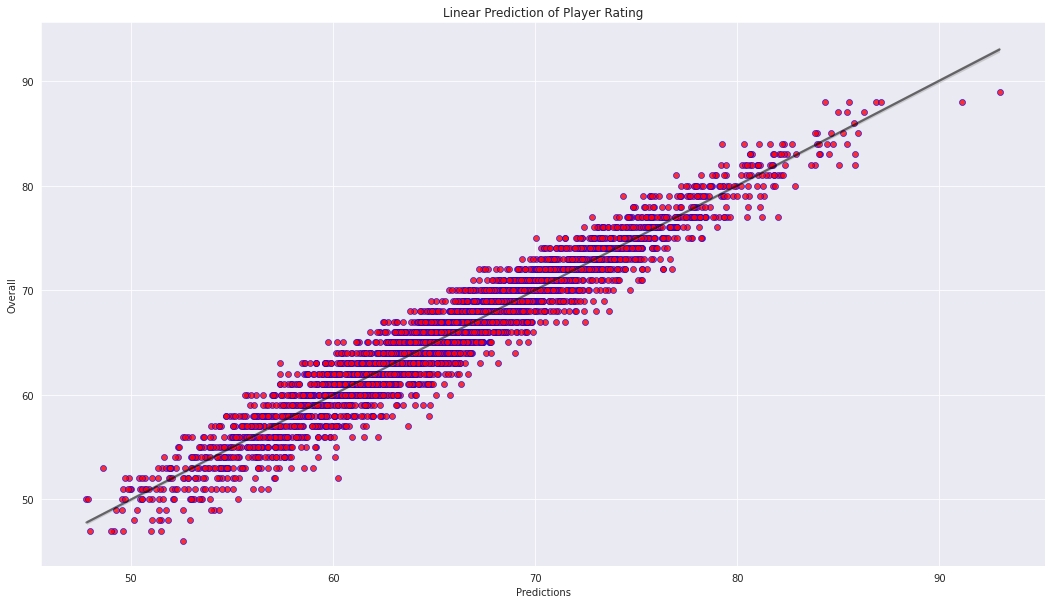

In [40]:
#melakukan visualisasi terhadap hasil
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()